# Segment Analysis

In this notebook different segmentation methods are used and the accuracy grouped on these segments are explored

Data gathered in the pilot study is included in the analysis.

In [1]:
import matplotlib
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
from nexa_preprocessing.utils.time_series_operations import slice_by
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper
from coding_interpreter.metadata import Metadata

In [3]:
Mapper._load_data_if_needed()

## Emotion analysis

Data grouped by emotions

In [4]:
df = pd.read_csv("data/completed_export.csv")
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1
...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1


In [5]:
df["emotion_id"].unique()

array([39, 10, 14,  6, 43, 26,  0, 40, 32, 22, 31, 35, 17,  1, 11,  4, 37,
        3, 30, 15, 12, 27,  2,  7, 13, 36, 33,  9, 19, 23, 16,  8,  5, 29,
       42, 25, 38, 24, 20, 21, 41, 34, 18, 28])

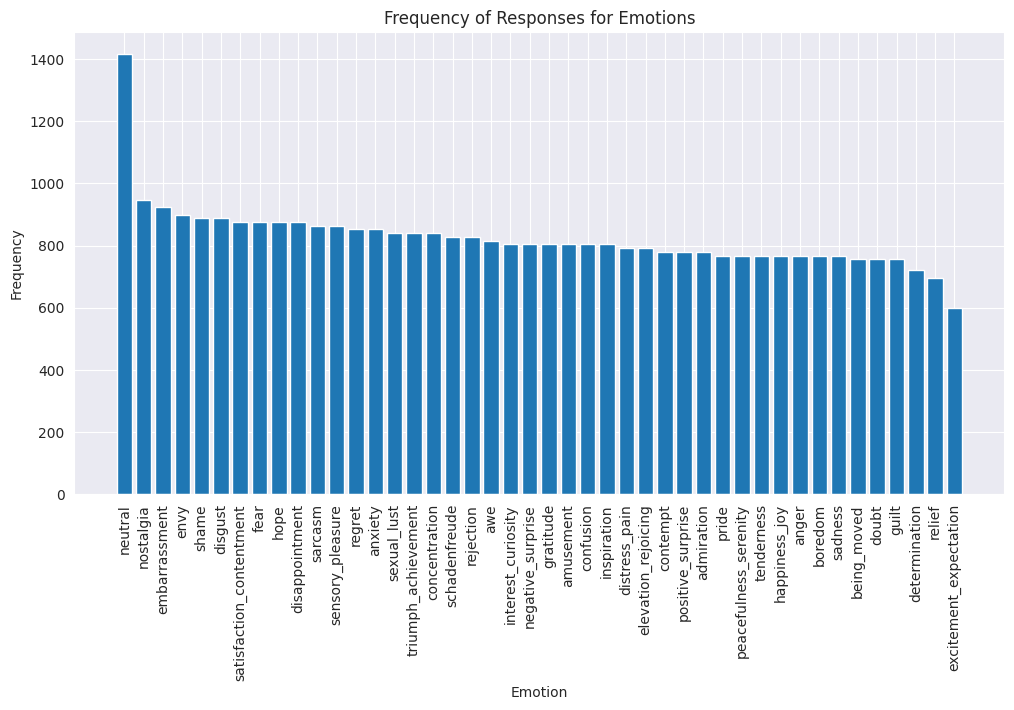

In [6]:
emotion_id_counts = df['emotion_id'].value_counts()

# Map emotion IDs to actual emotions using your Mapper class
mapped_emotions = emotion_id_counts.index.map(Mapper.get_emotion_from_id)

# Create a histogram plot
plt.figure(figsize=(12, 6))
plt.bar(mapped_emotions, emotion_id_counts.values)

# Customize the plot
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Responses for Emotions')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### Emotion Accuracies

Accuracies for data grouped by emotions

In [7]:
# Map emotion IDs to actual emotions using your Mapper class and create a new 'emotion' column
df['emotion'] = df['emotion_id'].map(Mapper.get_emotion_from_id)

In [8]:
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status,emotion
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,embarrassment
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,fear
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,rejection
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,sadness
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,shame
...,...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,rejection
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,anxiety
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,confusion
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,disappointment


In [9]:
# Add a new column 'accurate' that indicates whether the answer is accurate
df['accurate'] = df['emotion_id'] == df['emotion_id_reply']

# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_emotion = df.groupby('emotion')['accurate'].mean().reset_index()

# Rename the columns for clarity
accuracy_by_emotion.columns = ['emotion', 'accuracy']

# Print or plot the accuracy results
print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))

                     emotion  accuracy
2                      anger  0.703125
27                   neutral  0.605932
10             determination  0.579167
7              concentration  0.569048
12                   disgust  0.540541
38             schadenfreude  0.530193
6                    boredom  0.529948
18    excitement_expectation  0.506667
19                      fear  0.498858
36                   sarcasm  0.475694
8                  confusion  0.470149
35                   sadness  0.467448
30         positive_surprise  0.461538
1                  amusement  0.451493
34                    relief  0.448276
9                   contempt  0.437179
42                tenderness  0.397135
28                 nostalgia  0.391350
26         negative_surprise  0.388060
40               sexual_lust  0.386905
29     peacefulness_serenity  0.368490
22             happiness_joy  0.361979
25        interest_curiosity  0.359453
11            disappointment  0.345890
5                being_mo

In [10]:
accuracy_by_emotion.to_csv("data/accuracy_by_emotion.csv", index=False)

## Stimulus Analysis

Data grouped by stimulus, i.e. filename

In [11]:
df["filename"].unique()

array(['A102_emb_p_2', 'A102_fea_p_2', 'A102_rej_p_3', ...,
       'A424_mov_p_2', 'A72_exc_v_3', 'A207_dist_v_3'], dtype=object)

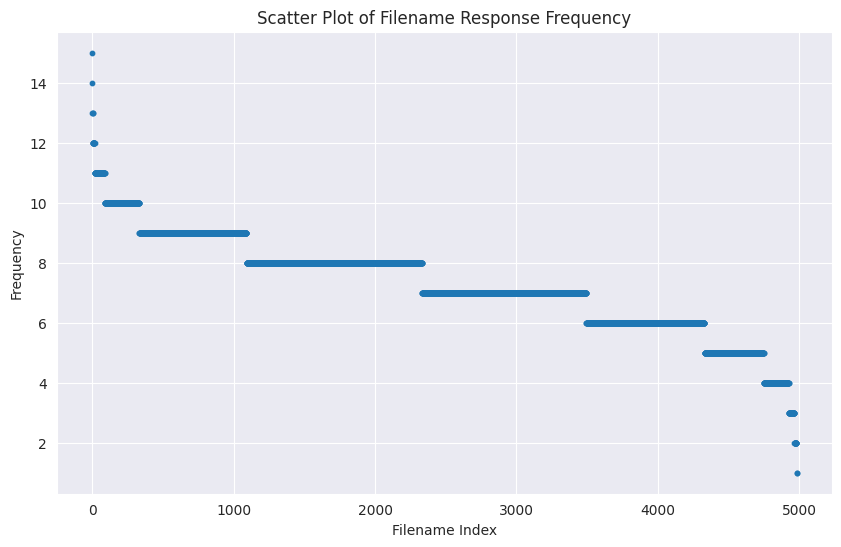

In [12]:
plt.figure(figsize=(10, 6))

# Count the frequency of each filename
filename_counts = df['filename'].value_counts()

# Create a scatter plot to visualize filename frequencies
plt.scatter(range(len(filename_counts)), filename_counts, marker='o', s=10)

# Customize the plot
plt.xlabel('Filename Index')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Filename Response Frequency')

# Show the plot
plt.show()

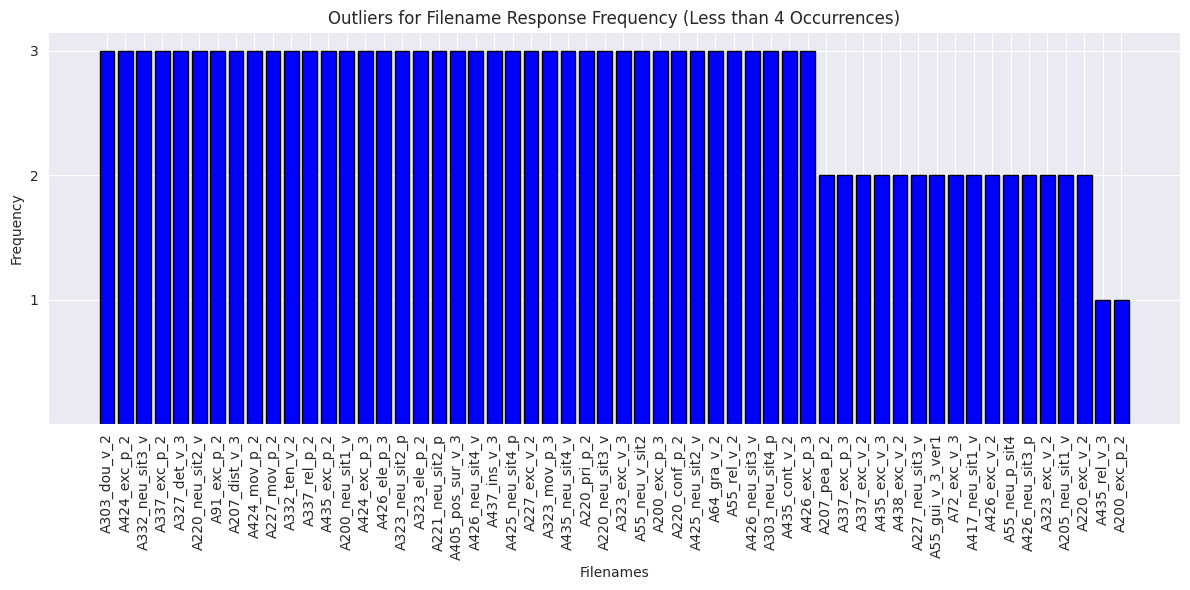

In [13]:
plt.figure(figsize=(12, 6))

# Count the frequency of each filename
filename_counts = df['filename'].value_counts()

# Define a threshold for outliers (e.g., less than 4 occurrences)
threshold = 4

# Filter filenames with less than the threshold occurrences
outlier_filenames = filename_counts[filename_counts < threshold].index.tolist()

# Create a DataFrame with outlier filenames and their frequencies
outlier_df = pd.DataFrame({'Filename': outlier_filenames, 'Frequency': [filename_counts[filename] for filename in outlier_filenames]})

# Sort the DataFrame by frequency in descending order
outlier_df = outlier_df.sort_values(by='Frequency', ascending=False)

# Round frequencies to integers
outlier_df['Frequency'] = outlier_df['Frequency'].astype(int)

# Create a bar plot
plt.bar(outlier_df['Filename'], outlier_df['Frequency'], color='blue', edgecolor='black')

# Customize the plot
plt.xlabel('Filenames')
plt.ylabel('Frequency')
plt.title('Outliers for Filename Response Frequency (Less than 4 Occurrences)')

# Set y-ticks to discrete values
yticks = np.arange(outlier_df['Frequency'].min(), outlier_df['Frequency'].max() + 1, 1)
plt.yticks(yticks)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
slices = slice_by(df, "filename")

# Create an empty dictionary to store information for each filename
filename_info = {}

for df_ in slices:
    # identify unique aliases
    unique_aliases = df_["alias"].unique()
    # save how many aliases, e.g. responses, for current filename
    coverage = len(unique_aliases)
    
    # Calculate accuracy (mean of the "accurate" column)
    accuracy = df_["accurate"].mean()
    n_correct_answers = sum(df_["accurate"])
    
    unique_filenames = df_["filename"].unique()
    
    assert len(unique_filenames) == 1
    filename = unique_filenames[0]
        
    meta = Metadata(filename)
    
    # Store information in the dictionary
    filename_info[filename] = {
        "emotion": Mapper.get_emotion_from_emotion_abr(meta.emotion_1),
        "emotion_id": meta.emotion_1_id,
        "intensity_level": meta.intensity_level,
        "mode": meta.mode,
        "coverage": coverage,
        "n_correct_answers": n_correct_answers,
        "accuracy": accuracy
    }

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(filename_info, orient="index")

# Reset the index to have "filename" as a column
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={"index": "filename"}, inplace=True)

# Display the DataFrame
accuracy_df

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy
0,A102_adm_p_2,admiration,5,2,p,4,0,0.000000
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571
2,A102_adm_v_2,admiration,5,2,v,11,0,0.000000
3,A102_adm_v_3,admiration,5,3,v,9,2,0.222222
4,A102_amu_p_2,amusement,13,2,p,4,0,0.000000
...,...,...,...,...,...,...,...,...
4977,A91_ten_v_3,tenderness,28,3,v,8,4,0.500000
4978,A91_tri_p_2,triumph_achievement,20,2,p,10,2,0.200000
4979,A91_tri_p_3,triumph_achievement,20,3,p,8,2,0.250000
4980,A91_tri_v_2,triumph_achievement,20,2,v,8,0,0.000000


In [15]:
accuracy_df.columns

Index(['filename', 'emotion', 'emotion_id', 'intensity_level', 'mode',
       'coverage', 'n_correct_answers', 'accuracy'],
      dtype='object')

## Find items with significant results

In [16]:
# Function to perform the one-sided binomial test
def perform_binomial_test(row):
    alpha = 0.05
    p_expected = 1/11
    
    n = row['coverage']
    x = row['n_correct_answers']
    
    # Perform the one-sided binomial test (greater than chance)
    p_value = stats.binom_test(x, n, p_expected, alternative='greater')
    
    return p_value

In [17]:
accuracy_df['p_value_greater'] = accuracy_df.apply(perform_binomial_test, axis=1)

/tmp/ipykernel_37757/1507360330.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(x, n, p_expected, alternative='greater')


In [18]:
accuracy_df_p_value_greater = accuracy_df[accuracy_df["p_value_greater"] <= 0.005]

In [19]:
accuracy_df_p_value_greater

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater
7,A102_amu_v_3,amusement,13,3,v,11,5,0.454545,1.793374e-03
9,A102_ang_p_3,anger,12,3,p,7,7,1.000000,5.131581e-08
10,A102_ang_v_2,anger,12,2,v,7,4,0.571429,1.907460e-03
11,A102_ang_v_3,anger,12,3,v,8,7,0.875000,3.778710e-07
12,A102_anx_p_2,anxiety,34,2,p,7,4,0.571429,1.907460e-03
...,...,...,...,...,...,...,...,...,...
4954,A91_sar_p_2,sarcasm,31,2,p,7,5,0.714286,1.114066e-04
4956,A91_sar_v_2,sarcasm,31,2,v,7,4,0.571429,1.907460e-03
4963,A91_scha_p_3,schadenfreude,15,3,p,8,5,0.625000,2.746842e-04
4965,A91_scha_v_3,schadenfreude,15,3,v,8,7,0.875000,3.778710e-07


In [35]:
filenames = []
emotion_id_counts = {}
for index, data in accuracy_df_p_value_greater.iterrows():
    emotion_id = data["emotion_id"]
    if emotion_id in emotion_id_counts:
        emotion_id_counts[emotion_id] += 1
    else:
        emotion_id_counts[emotion_id] = 1
    
    if emotion_id_counts[emotion_id] <= 2:
        filenames.append(data["filename"])
    
print(filenames)
print(len(filenames))

emotion_ids = []

['A102_amu_v_3', 'A102_ang_p_3', 'A102_ang_v_2', 'A102_anx_p_2', 'A102_anx_p_3', 'A102_bor_p_2', 'A102_bor_p_3', 'A102_conc_p_3', 'A102_conc_v_2', 'A102_conf_p_3', 'A102_conf_v_2', 'A102_det_v_3', 'A102_disa_v_2', 'A102_disa_v_3', 'A102_disg_p_3', 'A102_disg_v_3', 'A102_dist_p_3', 'A102_emb_p_2', 'A102_emb_v_3', 'A102_env_p_3', 'A102_exc_p_3', 'A102_exc_v_3', 'A102_fea_p_2', 'A102_fea_p_3', 'A102_gra_p_3', 'A102_gra_v_3', 'A102_mov_v_3', 'A102_neg_sur_p_2', 'A102_neg_sur_p_3', 'A102_neu_sit1_v', 'A102_neu_sit2_v', 'A102_nos_p_2', 'A102_nos_p_3', 'A102_pea_p_2', 'A102_ple_p_2', 'A102_ple_v_2', 'A102_pos_sur_p_3', 'A102_rel_p_2', 'A102_rel_p_3', 'A102_sad_p_2', 'A102_sad_p_3', 'A102_sar_p_2', 'A102_sat_p_3', 'A102_scha_p_3', 'A102_scha_v_2', 'A102_sex_p_2', 'A102_sex_p_3', 'A102_ten_v_3', 'A102_tri_p_2', 'A102_tri_p_3', 'A200_amu_v_2', 'A200_det_p_3', 'A200_dist_p_2', 'A200_int_v_2', 'A200_int_v_3', 'A200_pos_sur_p_3', 'A200_sar_p_2', 'A205_cont_p_2', 'A205_cont_p_3', 'A205_hap_p_3', 'A2

In [ ]:
fmri_emotions = [
    "anger", 
    "anxiety", 
    "disgust", 
    "sadness",
    "happiness_joy", 
    "interest_curiosity", 
    "positive_surprise",
    "relief",
    "neutral"
]

In [59]:
accuracy_df_ok = accuracy_df[accuracy_df["accuracy"] >= 0.33]

In [61]:
accuracy_df_ok = accuracy_df_ok[accuracy_df_ok["emotion"].isin(fmri_emotions)]

In [64]:
accuracy_df_ok["emotion"].value_counts()

emotion
neutral               190
anger                  96
disgust                82
positive_surprise      77
relief                 69
sadness                68
happiness_joy          67
interest_curiosity     58
anxiety                54
Name: count, dtype: int64

In [65]:
accuracy_df_ok.to_csv("fmri_files.csv", index=False)

In [45]:
accuracy_df['p_value_greater'] = accuracy_df.apply(perform_binomial_test, axis=1)

/tmp/ipykernel_23436/1507360330.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(x, n, p_expected, alternative='greater')


In [52]:
accuracy_df_p_value_greater = accuracy_df[accuracy_df["p_value_greater"] <= 0.08]

In [53]:
accuracy_df_p_value_greater

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571,1.986799e-02
7,A102_amu_v_3,amusement,13,3,v,11,5,0.454545,1.793374e-03
9,A102_ang_p_3,anger,12,3,p,7,7,1.000000,5.131581e-08
10,A102_ang_v_2,anger,12,2,v,7,4,0.571429,1.907460e-03
11,A102_ang_v_3,anger,12,3,v,8,7,0.875000,3.778710e-07
...,...,...,...,...,...,...,...,...,...
4963,A91_scha_p_3,schadenfreude,15,3,p,8,5,0.625000,2.746842e-04
4964,A91_scha_v_2,schadenfreude,15,2,v,6,3,0.500000,1.217062e-02
4965,A91_scha_v_3,schadenfreude,15,3,v,8,7,0.875000,3.778710e-07
4976,A91_ten_v_2,tenderness,28,2,v,8,3,0.375000,2.966465e-02


In [54]:
accuracy_df_p_value_greater_fmri = accuracy_df_p_value_greater[accuracy_df_p_value_greater["emotion"].isin(fmri_emotions)]

In [55]:
accuracy_df_p_value_greater_fmri["emotion"].value_counts()

emotion
neutral               185
anger                  92
disgust                83
positive_surprise      72
sadness                65
relief                 63
happiness_joy          58
interest_curiosity     55
anxiety                52
Name: count, dtype: int64

In [56]:
accuracy_df_p_value_greater_fmri

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater
9,A102_ang_p_3,anger,12,3,p,7,7,1.000000,5.131581e-08
10,A102_ang_v_2,anger,12,2,v,7,4,0.571429,1.907460e-03
11,A102_ang_v_3,anger,12,3,v,8,7,0.875000,3.778710e-07
12,A102_anx_p_2,anxiety,34,2,p,7,4,0.571429,1.907460e-03
13,A102_anx_p_3,anxiety,34,3,p,9,5,0.555556,5.715525e-04
...,...,...,...,...,...,...,...,...,...
4914,A91_neu_sit3_p,neutral,22,1,p,5,4,0.800000,3.166699e-04
4915,A91_neu_sit3_v,neutral,22,1,v,6,4,0.666667,8.811438e-04
4916,A91_neu_sit4_p,neutral,22,1,p,5,4,0.800000,3.166699e-04
4948,A91_rel_v_2,relief,38,2,v,7,5,0.714286,1.114066e-04


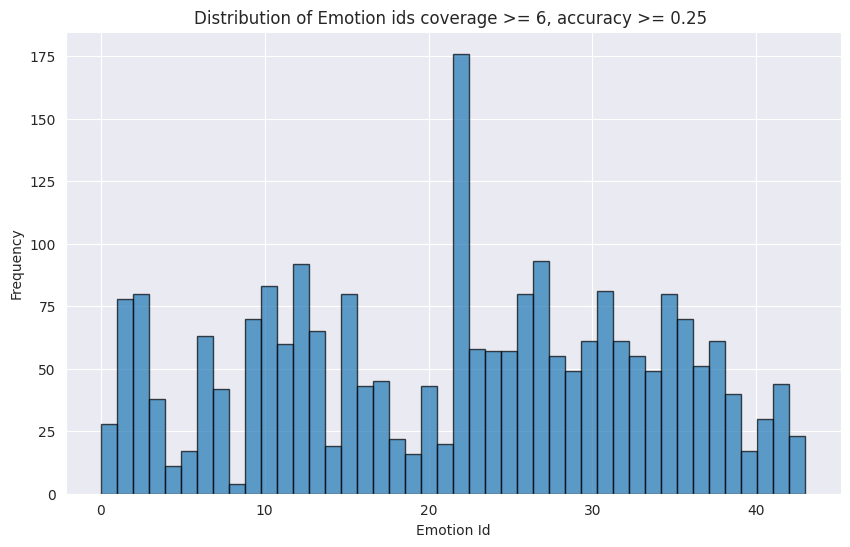

In [24]:
# Create a histogram of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracy_df_p_value_greater["emotion_id"], bins=44, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Distribution of Emotion ids coverage >= 6, accuracy >= 0.25 ")
plt.xlabel("Emotion Id")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

In [18]:
accuracy_df

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy,p_value_greater
0,A102_adm_p_2,admiration,5,2,p,4,0,0.000000,1.000000
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571,0.019868
2,A102_adm_v_2,admiration,5,2,v,11,0,0.000000,1.000000
3,A102_adm_v_3,admiration,5,3,v,9,2,0.222222,0.194215
4,A102_amu_p_2,amusement,13,2,p,4,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
4977,A91_ten_v_3,tenderness,28,3,v,8,4,0.500000,0.003540
4978,A91_tri_p_2,triumph_achievement,20,2,p,10,2,0.200000,0.228913
4979,A91_tri_p_3,triumph_achievement,20,3,p,8,2,0.250000,0.160287
4980,A91_tri_v_2,triumph_achievement,20,2,v,8,0,0.000000,1.000000


In [19]:
accuracy_df.to_csv("data/accuracy_by_filename.csv", index=False)

In [75]:
accuracy_conditions_df = accuracy_df[accuracy_df['coverage'] >= 6]

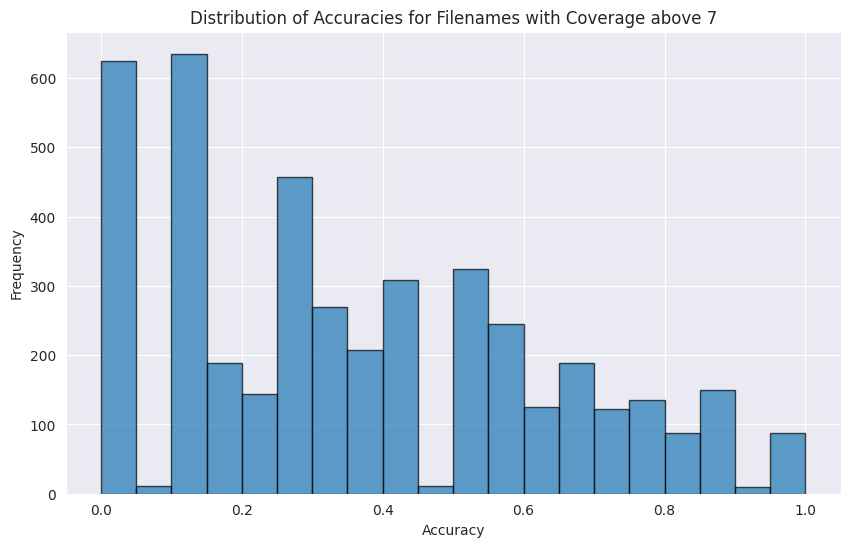

In [76]:
# Create a histogram of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracy_conditions_df["accuracy"], bins=20, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Distribution of Accuracies for Filenames with Coverage above 7")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

In [77]:
accuracy_conditions_df.to_csv("data/accuracy_by_filename_coverage_above_6.csv", index=False)

In [78]:
accuracy_conditions_df = accuracy_conditions_df[accuracy_conditions_df["accuracy"] >= 0.25]

In [79]:
accuracy_conditions_df['emotion'].value_counts()

emotion
neutral                     131
concentration               102
sarcasm                      91
fear                         89
confusion                    87
disgust                      87
schadenfreude                86
anger                        85
disappointment               83
negative_surprise            79
boredom                      78
amusement                    76
determination                71
sadness                      71
positive_surprise            71
sensory_pleasure             70
nostalgia                    68
contempt                     67
sexual_lust                  66
satisfaction_contentment     65
happiness_joy                65
interest_curiosity           64
tenderness                   63
gratitude                    60
relief                       60
embarrassment                60
peacefulness_serenity        59
triumph_achievement          58
anxiety                      55
being_moved                  51
doubt                        50


In [81]:
accuracy_conditions_df

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy
1,A102_adm_p_3,admiration,5,3,p,7,3,0.428571
7,A102_amu_v_3,amusement,13,3,v,11,5,0.454545
9,A102_ang_p_3,anger,12,3,p,7,7,1.000000
10,A102_ang_v_2,anger,12,2,v,7,4,0.571429
11,A102_ang_v_3,anger,12,3,v,8,7,0.875000
...,...,...,...,...,...,...,...,...
4974,A91_ten_p_2,tenderness,28,2,p,7,2,0.285714
4975,A91_ten_p_3,tenderness,28,3,p,7,2,0.285714
4976,A91_ten_v_2,tenderness,28,2,v,8,3,0.375000
4977,A91_ten_v_3,tenderness,28,3,v,8,4,0.500000


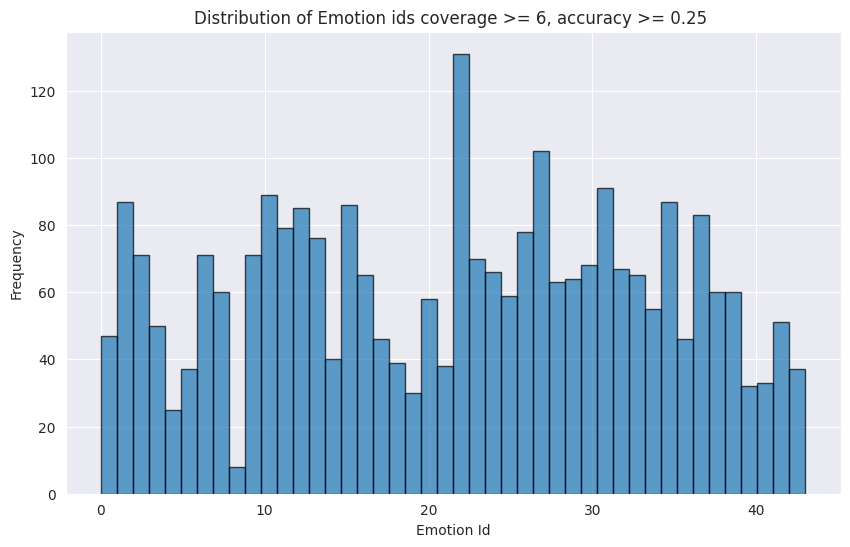

In [80]:
# Create a histogram of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracy_conditions_df["emotion_id"], bins=44, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Distribution of Emotion ids coverage >= 6, accuracy >= 0.25 ")
plt.xlabel("Emotion Id")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

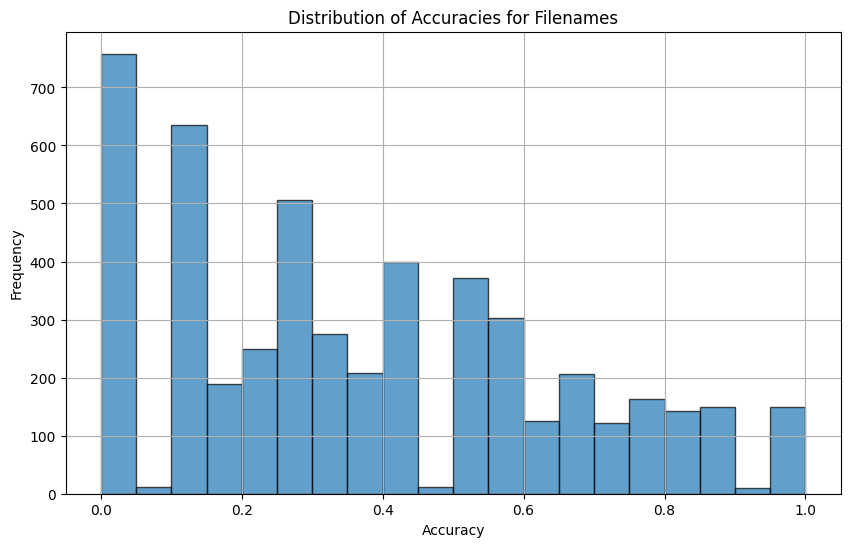

In [78]:
# Create a histogram of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracy_df["accuracy"], bins=20, edgecolor='k', alpha=0.7)

# Customize the plot
plt.title("Distribution of Accuracies for Filenames")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(True)

# Show the plot
plt.show()

In [79]:
accuracy_df.to_csv("data/accuracy_by_filename.csv", index=False)

### Special Export 

Export requested by Christina

In [80]:
special_emotions_swe = ["uttråkad",
                        "förvirring",
                        "besvikelse",
                        "tvivel",
                        "koncentration",
                        "intresse_nyfikenhet",
                        "beslutsamhet",
                        "tacksamhet"]

special_emotions_eng = Mapper.get_eng_translation_from_swe(special_emotions_swe)

# Filter the DataFrame
filtered_df = accuracy_df[accuracy_df["emotion"].isin(special_emotions_eng)]

# Display the filtered DataFrame
filtered_df

,filename,emotion,emotion_id,intensity_level,mode,coverage,n_correct_answers,accuracy
20,A102_bor_p_2,boredom,26,2,p,4,4,1.000000
21,A102_bor_p_3,boredom,26,3,p,6,5,0.833333
22,A102_bor_v_2,boredom,26,2,v,7,3,0.428571
23,A102_bor_v_3,boredom,26,3,v,6,5,0.833333
24,A102_conc_p_2,concentration,27,2,p,6,2,0.333333
...,...,...,...,...,...,...,...,...
4881,A91_gra_v_3,gratitude,7,3,v,6,4,0.666667
4898,A91_int_p_2,interest_curiosity,29,2,p,7,1,0.142857
4899,A91_int_p_3,interest_curiosity,29,3,p,9,4,0.444444
4900,A91_int_v_2,interest_curiosity,29,2,v,7,0,0.000000


In [81]:
filtered_df.to_csv("data/accuracy_by_filename_special.csv")

## Intensity Level Analysis

Data grouped by intensity level

In [82]:
# Define a function to extract mode and intensity_level from Metadata
def extract_metadata(filename):
    meta = Metadata(filename)  # Create a Metadata object
    return pd.Series([meta.mode, meta.intensity_level])

# Apply the function to create new columns
df[['mode', 'intensity_level']] = df['filename'].apply(extract_metadata)

# Display the updated DataFrame
df

,filename,alias,emotion_id,valence,set_number,video_id,emotion_id_reply,emotion_options,randomization_id,processed_status,emotion,accurate,mode,intensity_level
0,A102_emb_p_2,0010541301574d33a41c542299f184a6,39,neg,0,A102,40,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,embarrassment,False,p,2
1,A102_fea_p_2,0010541301574d33a41c542299f184a6,10,neg,0,A102,32,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,fear,False,p,2
2,A102_rej_p_3,0010541301574d33a41c542299f184a6,14,neg,0,A102,14,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,rejection,True,p,3
3,A102_sad_p_3,0010541301574d33a41c542299f184a6,6,neg,0,A102,43,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,sadness,False,p,3
4,A102_sha_v_2,0010541301574d33a41c542299f184a6,43,neg,0,A102,39,"['40', '43', '14', '10', '39', '22', '32', '6'...",161,1,shame,False,v,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36295,A72_rej_p_3,ff807190c01845fa827a02d5e23ed14c,14,neg,0,A72,1,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,rejection,False,p,3
36296,A91_anx_p_3,ff807190c01845fa827a02d5e23ed14c,34,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,anxiety,False,p,3
36297,A91_conf_p_3,ff807190c01845fa827a02d5e23ed14c,1,neg,0,A91,3,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,confusion,False,p,3
36298,A91_disa_v_3,ff807190c01845fa827a02d5e23ed14c,37,neg,0,A91,34,"['34', '14', '39', '11', '12', '43', '37', '3'...",127,1,disappointment,False,v,3


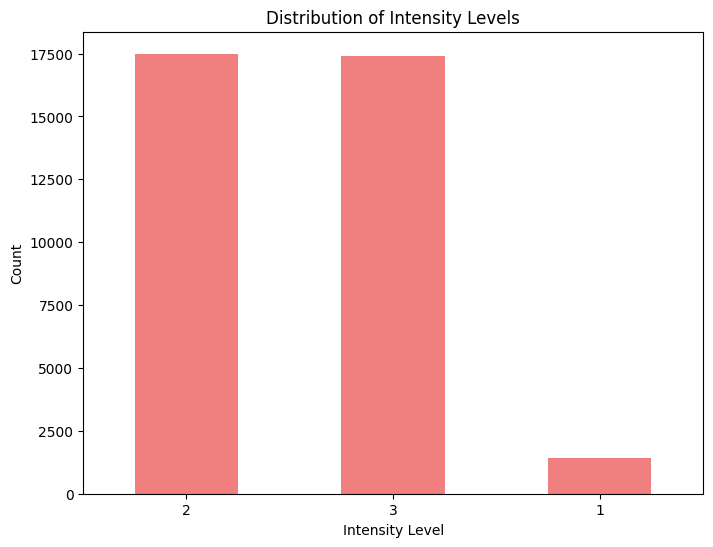

In [83]:
# Count the occurrences of each intensity level
intensity_counts = df['intensity_level'].value_counts()

# Create a bar plot for intensity levels
plt.figure(figsize=(8, 6))
intensity_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Intensity Levels')
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Some videos have intensity level = 1, these are the neutral videos (TODO: verify this)

In [84]:
# Filter the DataFrame for intensity level 2
df_intensity_2 = df[df['intensity_level'] == 2]

# Calculate accuracy for intensity level 2
accuracy_intensity_2 = df_intensity_2['accurate'].mean()

# Filter the DataFrame for intensity level 3
df_intensity_3 = df[df['intensity_level'] == 3]

# Calculate accuracy for intensity level 3
accuracy_intensity_3 = df_intensity_3['accurate'].mean()

# Display the accuracies for both intensity levels
print(f'Accuracy for Intensity Level 2: {accuracy_intensity_2}')
print(f'Accuracy for Intensity Level 3: {accuracy_intensity_3}')

Accuracy for Intensity Level 2: 0.3345527293512432
Accuracy for Intensity Level 3: 0.37466214273391224


## Mode Analysis

Data grouped by mode: prosody and vocalization

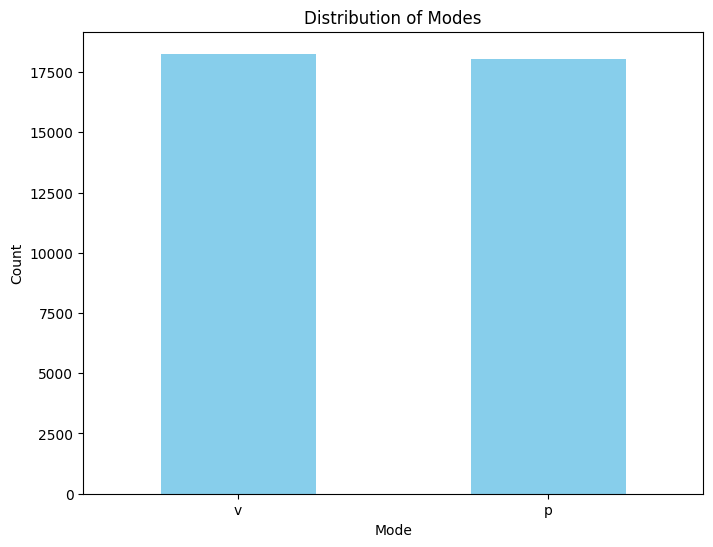

In [85]:
# Count the occurrences of each mode
mode_counts = df['mode'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Modes')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [86]:
# Filter the DataFrame for mode "p"
df_mode_p = df[df['mode'] == 'p']

# Calculate accuracy for mode "p"
accuracy_mode_p = df_mode_p['accurate'].mean()

# Filter the DataFrame for mode "v"
df_mode_v = df[df['mode'] == 'v']

# Calculate accuracy for mode "v"
accuracy_mode_v = df_mode_v['accurate'].mean()

# Display the accuracies for both modes
print(f'Accuracy for Mode "p": {accuracy_mode_p}')
print(f'Accuracy for Mode "v": {accuracy_mode_v}')

Accuracy for Mode "p": 0.3513663322432238
Accuracy for Mode "v": 0.37718385453748837
